In [233]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## <b>`Exercise 01`

In [252]:
# prepare data 
x = np.array([90,130,210,300,350,420,480,530,640,710])
y= np.array([7.1,10.9,19.2,28,32.8,39.9,46.1,51,62.2,68.9,])

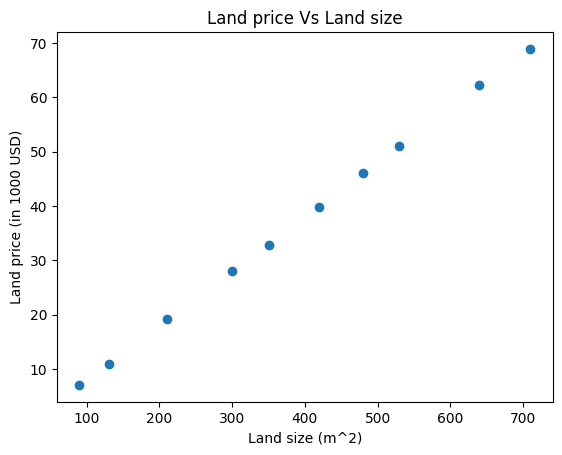

In [253]:
plt.scatter(x,y)
plt.title('Land price Vs Land size')
plt.xlabel('Land size (m^2)')
plt.ylabel('Land price (in 1000 USD)')
plt.show()

In [254]:
corr = np.corrcoef(x,y)
print(corr)

[[1.         0.99997851]
 [0.99997851 1.        ]]


#### <b>`Define hypothesis function`

In [255]:
def hyp(x,a,b):
    y = a*x + b 
    return y

#### <b>`Define cost function or mean square error `

In [256]:
def cost_func(x,a,b,y):
    j = ((hyp(x,a,b)-y)**2).mean()
    return j

#### <b>`Define gradient descent or study the slope of hypothesis line`

In [257]:
def grad_a(x,a,b,y):
    grad = ((hyp(x=x,a=a,b=b)-y)*x).mean()
    grad = 2*grad
    return grad

#### <b>`Define the intercept b of hypothesis line`

In [258]:
def grad_b(x,a,b,y):
    grad = (hyp(x=x,a=a,b=b)-y).mean()
    grad = grad*2 
    return grad

#### <b>`Training data`

In [259]:
a,b = 0,0 # initialize a and b 
alpha = 0.000001 # learning rate 
j_list = []
for iter in range(30):
    j = cost_func(x=x,a=a,b=b,y=y)
    j_list.append(j) # add j to j_list 
    a += -alpha * grad_a(a=a,x=x,b=b,y=y)
    b += -alpha * grad_b(a=a,b=b,x=x,y=y)
    print(f'Iteration{iter} : mse = {j:.4f}')

Iteration0 : mse = 1733.1970
Iteration1 : mse = 674.0780
Iteration2 : mse = 262.4764
Iteration3 : mse = 102.5172
Iteration4 : mse = 40.3528
Iteration5 : mse = 16.1941
Iteration6 : mse = 6.8054
Iteration7 : mse = 3.1567
Iteration8 : mse = 1.7387
Iteration9 : mse = 1.1877
Iteration10 : mse = 0.9735
Iteration11 : mse = 0.8903
Iteration12 : mse = 0.8579
Iteration13 : mse = 0.8454
Iteration14 : mse = 0.8405
Iteration15 : mse = 0.8386
Iteration16 : mse = 0.8379
Iteration17 : mse = 0.8376
Iteration18 : mse = 0.8375
Iteration19 : mse = 0.8374
Iteration20 : mse = 0.8374
Iteration21 : mse = 0.8374
Iteration22 : mse = 0.8374
Iteration23 : mse = 0.8374
Iteration24 : mse = 0.8374
Iteration25 : mse = 0.8374
Iteration26 : mse = 0.8374
Iteration27 : mse = 0.8374
Iteration28 : mse = 0.8374
Iteration29 : mse = 0.8374


<b>`Converge values of a and b|`

In [260]:
print(f'a = {a:.4f} , b = {b:.4f}')

a = 0.0959 , b = 0.0001


<b>`Plot the cost function Vs Iteration`

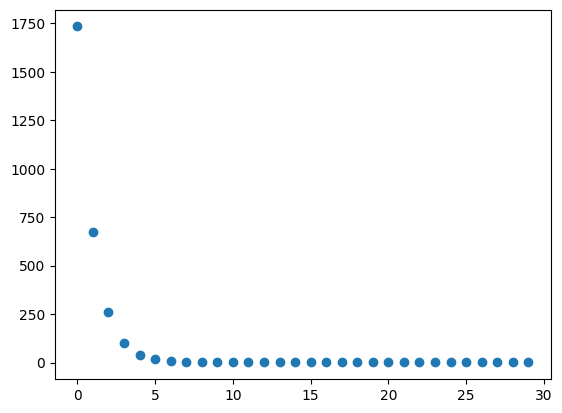

In [261]:
plt.scatter(range(30),j_list)
plt.show()

`Base on scatterplot and iterations above we observe that the mean square error is decreasing when the number of iteration performance is increasing`

### <b>`Evaluation the model`

In [248]:
RSS = ((hyp(x=x,a=a,b=b)-y)**2).sum() # Residual Sum of Squares
TSS = ((hyp(x=x,a=a,b=b)-y.mean())**2).sum() # total sum of square
R_2 = 1 - (RSS/TSS)
print(f'R squared value = {R_2:.4f}')

R squared value = -0.2914


`Therefore, the accuracy of model = 0.9977 = 99.77% , and we can accept this model after evaluation`

#### <b>`Predict the land price` 

      x  y_predict
0    80   0.135923
1    90   0.151678
2   100   0.167433
3   110   0.183188
4   120   0.198943
5   130   0.214698
6   140   0.230452
7   150   0.246207
8   160   0.261962
9   170   0.277717
10  180   0.293472
11  190   0.309227
12  200   0.324981
13  210   0.340736
14  220   0.356491
15  230   0.372246
16  240   0.388001
17  250   0.403755
18  260   0.419510
19  270   0.435265
20  280   0.451020
21  290   0.466775
22  300   0.482530
23  310   0.498284
24  320   0.514039
25  330   0.529794
26  340   0.545549
27  350   0.561304
28  360   0.577058
29  370   0.592813
30  380   0.608568
31  390   0.624323
32  400   0.640078
33  410   0.655833
34  420   0.671587
35  430   0.687342
36  440   0.703097
37  450   0.718852
38  460   0.734607
39  470   0.750362
40  480   0.766116
41  490   0.781871
42  500   0.797626
43  510   0.813381
44  520   0.829136
45  530   0.844890
46  540   0.860645
47  550   0.876400
48  560   0.892155
49  570   0.907910
50  580   0.923665
51  590   0.

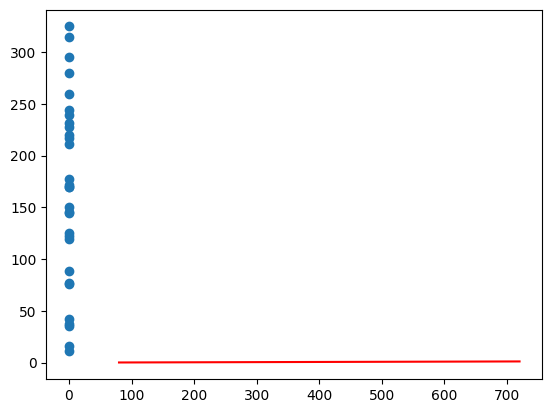

In [249]:
x_new = np.arange(80,730,10) # range from 80 to 730 with step size = 10
y_predict = hyp(x=x_new,a=a,b=b)
df = pd.DataFrame({'x':x_new,'y_predict':y_predict})
print(df.head(60))

plt.scatter(x=x,y=y)
plt.plot(x_new,y_predict,color = 'red')
plt.show()

#### <b>`Exercise 02`
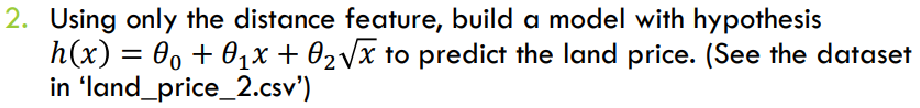

In [90]:
import seaborn as sns 

In [91]:
df = pd.read_csv('land_price_2.csv')
df

,dist_to_city,land_area,price
0,12.9,129,140.9
1,18.4,214,200.3
2,11.0,343,280.4
3,19.3,387,298.8
4,19.7,454,358.2
5,7.1,565,414.3
6,10.2,675,484.2
7,10.0,798,561.4
8,0.1,879,593.7
9,5.7,1016,690.9


In [92]:
df.shape

(30, 3)

In [93]:
x_multi = df.drop('price',axis=1) # call all feature except price 
x_multi.head()

,dist_to_city,land_area
0,12.9,129
1,18.4,214
2,11.0,343
3,19.3,387
4,19.7,454


In [94]:
x1 = df['land_area']
x1.head()

0    129
1    214
2    343
3    387
4    454
Name: land_area, dtype: int64

In [95]:
x2 = df['dist_to_city']
x2.head()

0    12.9
1    18.4
2    11.0
3    19.3
4    19.7
Name: dist_to_city, dtype: float64

In [96]:
y2 = df['price']
y2.head()

0    140.9
1    200.3
2    280.4
3    298.8
4    358.2
Name: price, dtype: float64

#### <b>`Define hypothesis function`

In [108]:
def hypo(x1,x2,a,b,c):
    y2 = a*x1 + b*x2 + c 
    return y2 
print(hypo(2,1,3,4,5))

15


#### <b>`Define cost function or mean square error`

In [109]:
def cos_funct(x1,x2,a,b,c,y2):
    J= ((hypo(x1,x2,a,b,c)-y2)**2).mean()
    return J

#### <b>`Define gradient descent finding slope of hypothesis function`

In [110]:
def grad_a(x1,x2,a,b,c,y2):
    grad_mul = ((hypo(x1,x2,a,b,c)-y2)*x1).mean()
    grad_mul = 2*grad_mul
    return grad_mul

In [111]:
def grad_b(x1,x2,a,b,c,y2):
    grad_mul = ((hypo(x1,x2,a,b,c)-y2)*x2).mean()
    grad_mul = 2*grad_mul
    return grad_mul

In [112]:
def grad_c(x1,x2,a,b,c,y2):
    grad_mul = ((hypo(x1,x2,a,b,c)-y2)).mean()
    grad_mul = 2*grad_mul
    return grad_mul

#### <b>`Training Data`

Iter0, mse = 1199843.3720
Iter1, mse = 1053912.8319
Iter2, mse = 925763.4447
Iter3, mse = 813228.6357
Iter4, mse = 714405.8203
Iter5, mse = 627624.2376
Iter6, mse = 551416.7031
Iter7, mse = 484494.8041
Iter8, mse = 425727.1167
Iter9, mse = 374120.0773
Iter10, mse = 328801.1845
Iter11, mse = 289004.2485
Iter12, mse = 254056.4373
Iter13, mse = 223366.9009
Iter14, mse = 196416.7827
Iter15, mse = 172750.4470
Iter16, mse = 151967.7757
Iter17, mse = 133717.4040
Iter18, mse = 117690.7793
Iter19, mse = 103616.9457
Iter20, mse = 91257.9619
Iter21, mse = 80404.8791
Iter22, mse = 70874.2083
Iter23, mse = 62504.8180
Iter24, mse = 55155.2099
Iter25, mse = 48701.1271
Iter26, mse = 43033.4527
Iter27, mse = 38056.3654
Iter28, mse = 33685.7195
Iter29, mse = 29847.6221
Iter30, mse = 26477.1839
Iter31, mse = 23517.4223
Iter32, mse = 20918.2975
Iter33, mse = 18635.8673
Iter34, mse = 16631.5434
Iter35, mse = 14871.4395
Iter36, mse = 13325.7982
Iter37, mse = 11968.4879
Iter38, mse = 10776.5612
Iter39, mse =

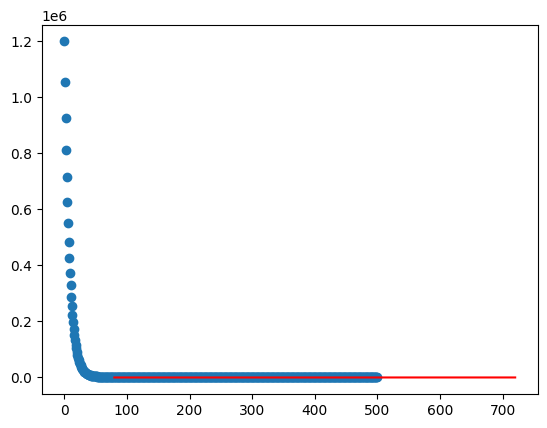

In [119]:
# Training Data 
a, b, c = 0,0,0
alpha = 0.00000001
J_list = []
Iterations = []
for iter in range(500):
    J = cos_funct(x1,x2,a,b,c,y2)
    J_list.append(J)
    a += -alpha*grad_a(x1,x2,a,b,c,y2)
    b += -alpha*grad_b(x1,x2,a,b,c,y2)
    c += -alpha*grad_c(x1,x2,a,b,c,y2)
    print(f"Iter{iter}, mse = {J:.4f}")
    Iterations.append(iter)

plt.scatter(Iterations,J_list)
plt.plot(x_new,y_predict,color = 'red')
plt.show()

In [120]:
print(f'a = {a:.4f} , b = {b:.4f} , c = {c:.4f}')

a = 0.6171 , b = 0.0051 , c = 0.0005


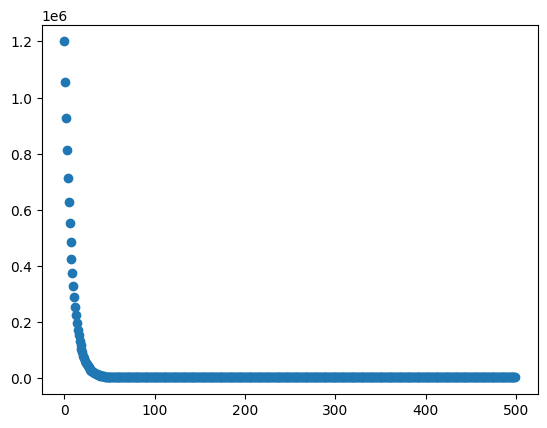

In [121]:
plt.scatter(range(500), J_list)
plt.show()

<b>`Base on the graph above, we have the mse is decreasing when iteration is increase`